#CREATING ANN in KERAS

- 1| train test split.
- 2| build ANN.
- 3| Train the ANN.
- 4| Predict!

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns

from keras.layers import Dense
from keras.models import Sequential

from sklearn.metrics import confusion_matrix

from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler

##Train Test Split

In [2]:
url = 'https://drive.google.com/file/d/1JBiGlPNE5baSr6wL_a_rgQNTDzNJ5tJI/view?usp=sharing'
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
dataset = pd.read_csv(url)

dataset

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,9996,15606229,Obijiaku,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,9997,15569892,Johnstone,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,9998,15584532,Liu,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,9999,15682355,Sabbatini,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [3]:
# detailed lok at the columns
for ind, col in enumerate(dataset.columns):
  print('{0}) {1}'.format(ind, col))

0) RowNumber
1) CustomerId
2) Surname
3) CreditScore
4) Geography
5) Gender
6) Age
7) Tenure
8) Balance
9) NumOfProducts
10) HasCrCard
11) IsActiveMember
12) EstimatedSalary
13) Exited


In [4]:
'''creating an input array X (independent variable) & 
output target array Y (dependent variable)'''

X = dataset.iloc[:, 3:13].values
Y = dataset.iloc[:, 13].values

In [5]:
X

array([[619, 'France', 'Female', ..., 1, 1, 101348.88],
       [608, 'Spain', 'Female', ..., 0, 1, 112542.58],
       [502, 'France', 'Female', ..., 1, 0, 113931.57],
       ...,
       [709, 'France', 'Female', ..., 0, 1, 42085.58],
       [772, 'Germany', 'Male', ..., 1, 0, 92888.52],
       [792, 'France', 'Female', ..., 1, 0, 38190.78]], dtype=object)

In [6]:
#Lable encoding
# Geography column
labelencoderX1 = LabelEncoder()
X[:, 1] = labelencoderX1.fit_transform(X[:, 1])

#Gender column
labelencoderX2 = LabelEncoder()
X[:, 2] = labelencoderX2.fit_transform(X[:, 2])

pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9
0,619,0,0,42,2,0.0,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.8,3,1,0,113931.57
3,699,0,0,39,1,0.0,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.1
...,...,...,...,...,...,...,...,...,...,...
9995,771,0,1,39,5,0.0,2,1,0,96270.64
9996,516,0,1,35,10,57369.61,1,1,1,101699.77
9997,709,0,0,36,7,0.0,1,0,1,42085.58
9998,772,1,1,42,3,75075.31,2,1,0,92888.52


In [7]:
 # Feature Scalling
XTrain, XTest, YTrain, YTest = train_test_split(X,Y, test_size = 0.2, random_state = 0)

len(XTrain), len(XTest)

(8000, 2000)

In [8]:
sc = StandardScaler()
XTrain = sc.fit_transform(XTrain)
XTest = sc.fit_transform(XTest)

In [9]:
pd.DataFrame(XTrain)

,0,1,2,3,4,5,6,7,8,9
0,0.169582,1.519198,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,-2.304559,0.313126,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-1.191196,-0.892945,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,0.035566,1.519198,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,2.056114,1.519198,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378
...,...,...,...,...,...,...,...,...,...,...
7995,-0.582970,0.313126,-1.091687,-0.656016,-0.339364,0.703104,0.809503,0.642595,0.968738,1.091330
7996,1.478815,1.519198,-1.091687,-1.613058,-0.339364,0.613060,-0.921591,0.642595,0.968738,0.131760
7997,0.901515,-0.892945,0.916013,-0.368904,0.006661,1.361474,0.809503,0.642595,-1.032270,1.412320
7998,-0.624205,1.519198,-1.091687,-0.081791,1.390762,-1.215717,0.809503,0.642595,0.968738,0.844321


## Build the ANN Structure

In [10]:
# Initialising
model = Sequential()

# inputLayer firstInputLayer
model.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim=10))

# secondHiddenLayer
model.add(Dense(units=6, kernel_initializer='uniform', activation='relu'))

# outputLayer
model.add(Dense(units=1, kernel_initializer='uniform', activation='sigmoid'))

# Compiling
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

##Training the ANN

In [11]:
#Fitting ANN to Training set
model.fit(XTrain, YTrain, batch_size=10, epochs=100)

Epoch 1/100
800/800 [==============================] - 8s 7ms/step - loss: 0.4971 - accuracy: 0.7952
Epoch 2/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4332 - accuracy: 0.7960
Epoch 3/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4269 - accuracy: 0.7960
Epoch 4/100
800/800 [==============================] - 3s 3ms/step - loss: 0.4234 - accuracy: 0.8065
Epoch 5/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4205 - accuracy: 0.8254
Epoch 6/100
800/800 [==============================] - 4s 4ms/step - loss: 0.4183 - accuracy: 0.8296
Epoch 7/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4169 - accuracy: 0.8311
Epoch 8/100
800/800 [==============================] - 3s 4ms/step - loss: 0.4151 - accuracy: 0.8330
Epoch 9/100
800/800 [==============================] - 2s 3ms/step - loss: 0.4141 - accuracy: 0.8330
Epoch 10/100
800/800 [==============================] - 2s 2ms/step - loss: 0.4127 - accura

##Predict!

In [12]:
YPred = model.predict(XTest)
YPred = (YPred > 0.5)
YPred = pd.DataFrame(YPred)
print(YPred.describe())
scores = model.evaluate(XTest, YTest)
print('%s: %.2f%%' % (model.metrics_names[1], scores[1]*100))

63/63 [==============================] - 0s 1ms/step
            0
count    2000
unique      2
top     False
freq     1800
63/63 [==============================] - 0s 2ms/step - loss: 0.3953 - accuracy: 0.8415
accuracy: 84.15%


##Confusion Matrix

In [13]:
cm = confusion_matrix(YTest, YPred)
df = pd.DataFrame(cm)
df.columns = ['Predected Retains', 'Predicted Exits']
df.index =  ['Actual Retains', 'Actual Exits']

df

,Predected Retains,Predicted Exits
Actual Retains,1539,56
Actual Exits,261,144


In [14]:
def make_confusion_matrix(data):
  dataPtc = data/np.sum(data)
  groupNames = ['True +', 'False +', 'False -', 'True -']
  groupPerccent = ['{0:.1%}'.format(value) for value in data.flatten()/np.sum(data)]
  groupCounts = ['{0:0.0f}'.format(value) for value in data.flatten()]
  labels =[f'{v1}\n{v2}\n{v3}' for v1,v2,v3 in zip(groupNames, groupCounts, groupPerccent)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(dataPtc, annot=labels, fmt='', cmap='binary')

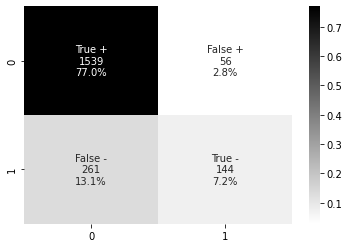

In [15]:
make_confusion_matrix(cm)